In [1]:
import altair as alt
import pandas as pd

In [87]:
data = pd.read_csv('/Users/pablo.vazquez/Dropbox/PS/DataVizExercises/Pats/Pats_penalty_plays_2009_2019.csv')
data.head()

Season Home Away  Week Team_Possesion Field_Position Quarter     To_go  \
0    2009   NE  BUF     1            BUF         BUF 43      Q1   3 and 7   
1    2009   NE  BUF     1             NE          NE 30      Q1   2 and 8   
2    2009   NE  BUF     1             NE          NE 45      Q1  1 and 10   
3    2009   NE  BUF     1            BUF         BUF 48      Q1  1 and 10   
4    2009   NE  BUF     1            BUF          NE 43      Q1   2 and 1   

  Time_left_Qtr Penalty_on            Penalty  Penalty_Yards game_type  
0         12:51        BUF  Illegal Formation              5       REG  
1         11:38         NE        False Start              5       REG  
2          9:51        BUF  Defensive Holding              5       REG  
3          5:34         NE       Encroachment              5       REG  
4          5:03        BUF        False Start              6       REG

In [88]:
data['Season']=data['Season'].astype(str)
data['team_penalty']= data['Penalty_on'].apply(lambda x: 'NE' if x =='NE' else 'Opponent')

In [89]:
data.head()

Season Home Away  Week Team_Possesion Field_Position Quarter     To_go  \
0   2009   NE  BUF     1            BUF         BUF 43      Q1   3 and 7   
1   2009   NE  BUF     1             NE          NE 30      Q1   2 and 8   
2   2009   NE  BUF     1             NE          NE 45      Q1  1 and 10   
3   2009   NE  BUF     1            BUF         BUF 48      Q1  1 and 10   
4   2009   NE  BUF     1            BUF          NE 43      Q1   2 and 1   

  Time_left_Qtr Penalty_on            Penalty  Penalty_Yards game_type  \
0         12:51        BUF  Illegal Formation              5       REG   
1         11:38         NE        False Start              5       REG   
2          9:51        BUF  Defensive Holding              5       REG   
3          5:34         NE       Encroachment              5       REG   
4          5:03        BUF        False Start              6       REG   

  team_penalty  
0     Opponent  
1           NE  
2     Opponent  
3           NE  
4     Opponent

In [75]:
grouped_bar = alt.Chart(data).mark_bar().encode(
    x=alt.X('team_penalty:N' , title=' '),
    #x='team_penalty:N',
    y=alt.Y('sum(Penalty_Yards):Q',title="Total Yards Granted" ,axis=alt.Axis(grid=False)),
    #y='sum(Penalty_Yards):Q',    
    color='team_penalty:N',
    column='Season:N'    
    )

In [54]:
type(grouped_bar)

altair.vegalite.v3.api.Chart

In [ ]:
chart.save('chart.png')
#chart.save('chart.html')

In [147]:
# alt base
base = alt.Chart(data).encode(    
    #x=alt.X('team_penalty:N' , title=' '),
    x='team_penalty:N',
    #y=alt.Y('sum(Penalty_Yards):Q',title="Total Yards Granted" ,axis=alt.Axis(grid=False)),
    y='sum(Penalty_Yards):Q',    
    color='team_penalty:N' ,
)


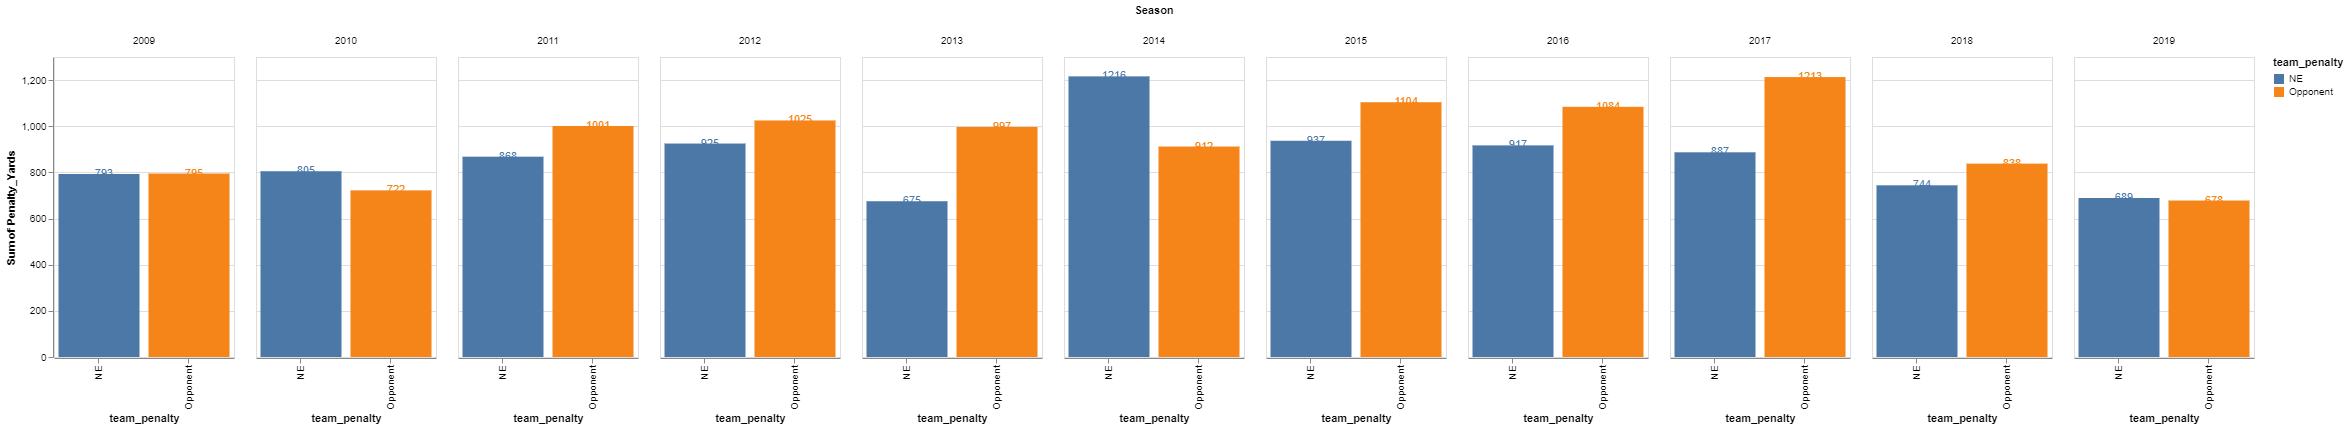

In [149]:

alt.layer(
  base.mark_bar(),
  base.mark_text(dx=5).encode(text='sum(Penalty_Yards):Q')
).facet(
  column='Season:N'
)

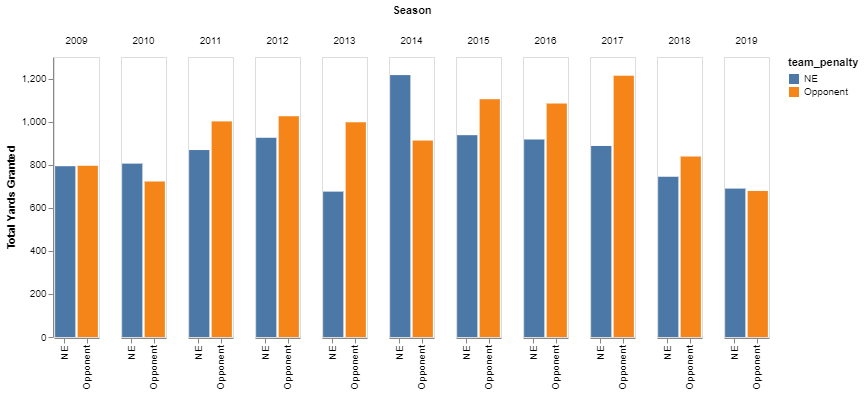

In [150]:
#this works
# but has grids and no text
alt.Chart(data).mark_bar().encode(
    x=alt.X('team_penalty:N' , title=' '),
    #x='team_penalty:N',
    y=alt.Y('sum(Penalty_Yards):Q',title="Total Yards Granted" ,axis=alt.Axis(grid=False)),
    #y='sum(Penalty_Yards):Q',    
    color='team_penalty:N' 
).properties(
    width=45,
    height=280
).facet(
    column='Season:N'
)

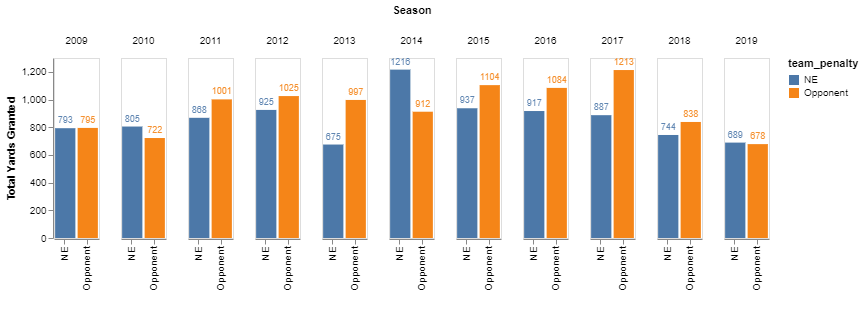

In [191]:
#this works but has grids
# has text
base = alt.Chart(data).encode(
    x=alt.X('team_penalty:N' , title=' '),    
    y=alt.Y('sum(Penalty_Yards):Q',title="Total Yards Granted" ,axis=alt.Axis(grid=False)),
    color='team_penalty:N'
).properties(
    width=45,
    height=180,
)

points = base.mark_bar(
 fontSize=30,
  line=False,
  text='')

text = base.mark_text(dx=0 ,dy=-8, fontSize=9).encode(
    text = 'sum(Penalty_Yards):Q',
    opacity=alt.value(0.9)
    
)

alt.layer(points, text).facet(
    column='Season:N'
)

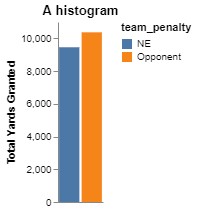

In [192]:
# single chart
#remove grids and axis
base = alt.Chart(data).encode(
    x=alt.X('team_penalty:N' , title=' ', bin=False),    
    y=alt.Y('sum(Penalty_Yards):Q',title="Total Yards Granted" ,axis=alt.Axis(grid=False)),
    color='team_penalty:N',    
).properties(
    width=45,
    height=180,
)

points = base.mark_bar().properties(
    title='A histogram'
).configure_axisX(
    labels=False,
    ticks=False, 
    title=None,
    labelAngle=45,
    grid=False
).configure_view(
    strokeOpacity=0 #this eliminates the box grid per chart
)

points


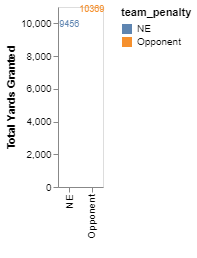

In [193]:
text

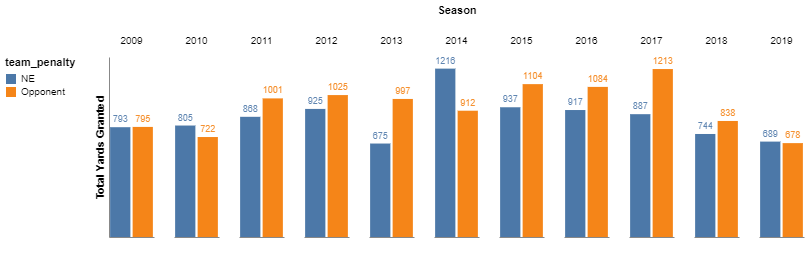

In [215]:
#this works but has grids
# has text
base = alt.Chart(data).encode(
    x=alt.X('team_penalty:N' , title=' '),    
    y=alt.Y('sum(Penalty_Yards):Q',title="Total Yards Granted" ),
    #color='team_penalty:N'
    color= alt.Color('team_penalty:N',legend=alt.Legend(orient="left"))
).properties(
    width=45,
    height=180,
)
points = base.mark_bar(
 fontSize=30,
  line=False,
  text='')

text = base.mark_text(dx=0 ,dy=-8, fontSize=9).encode(
    text = 'sum(Penalty_Yards):Q',    
    opacity=alt.value(0.9)    
)


alt.layer(points, text).facet(
    column='Season:N'
).configure_view(
    strokeWidth=0,
    strokeOpacity=0 #this eliminates the box grid per chart
                    #we apply the configure at layer level to avoid error
).configure_axis(
    labels=False,
    ticks=False, 
    title=None,
    labelAngle=45,
    grid=False
)

In [183]:
#pedir ayuda
alt.Chart.configure_axisX?

Signature:
alt.Chart.configure_axisX(
    self,
    bandPosition=Undefined,
    domain=Undefined,
    domainColor=Undefined,
    domainDash=Undefined,
    domainDashOffset=Undefined,
    domainOpacity=Undefined,
    domainWidth=Undefined,
    grid=Undefined,
    gridColor=Undefined,
    gridDash=Undefined,
    gridDashOffset=Undefined,
    gridOpacity=Undefined,
    gridWidth=Undefined,
    labelAlign=Undefined,
    labelAngle=Undefined,
    labelBaseline=Undefined,
    labelBound=Undefined,
    labelColor=Undefined,
    labelFlush=Undefined,
    labelFlushOffset=Undefined,
    labelFont=Undefined,
    labelFontSize=Undefined,
    labelFontStyle=Undefined,
    labelFontWeight=Undefined,
    labelLimit=Undefined,
    labelOpacity=Undefined,
    labelOverlap=Undefined,
    labelPadding=Undefined,
    labelSeparation=Undefined,
    labels=Undefined,
    maxExtent=Undefined,
    minExtent=Undefined,
    orient=Undefined,
    shortTimeLabels=Undefined,
    tickColor=Undefined,
    tickDash=